In [1]:
###reference:
    ###https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280


def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890],all_data.loc[891:].drop(['Survived'],axis=1)

In [2]:
import pandas as pd

train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

###JHU not necessary code???
#df_all=concat_df(train_data,test_data)

###JHU not necessary code???
#dfs=[train_data,test_data]

In [3]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")

train_data_contains: 891 row and 12 columns
test_data_contains: 418 row and 11 columns


In [4]:
###JHU use simple code to do the same thing to avoid potential errors
###JHU and focus on your analysical logical, to do an exploratory aalysis
###JHU not just to follow they footsetps. logical

print("train_data.shape")
display(train_data.shape)

print("test_data.shape")
display(test_data.shape)

train_data.shape


(891, 12)

test_data.shape


(418, 11)

In [5]:
print("first_3_row_of_train_data")
display(train_data.head(3))
print("first_3_row_of_test_data")
display(test_data.head(3))

first_3_row_of_train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


first_3_row_of_test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
###JHU first we take a look at our data, df.shape and then
###JHU we trying to fillin the nulls, data preparing process

print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing_value_in_test_data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df_all=concat_df(train_data,test_data)


In [8]:
####2 data cleansing 
### 2.1 Age


In [9]:
print("missing_age_values_in_total_data_set: "+str(df_all['Age'].isnull().sum()))
print("missing_percentage: "+str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0))+" %")

missing_age_values_in_total_data_set: 263
missing_percentage: 20.0 %


<AxesSubplot:ylabel='Frequency'>

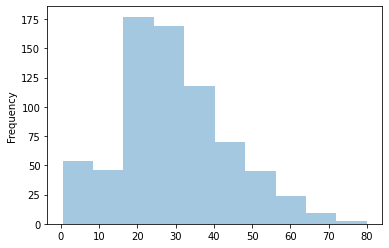

In [10]:
###JHU
import seaborn as sb

train_data['Age'].plot.hist(alpha=0.4)


###JHU we can see a un-normal distribution, since we lost many Age values
###JHU does that affect our job? should we fillin more young aged data???

<AxesSubplot:ylabel='Frequency'>

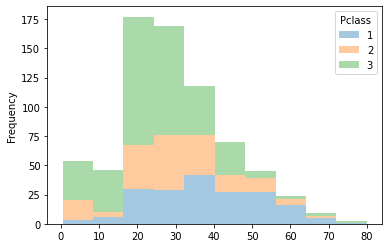

In [11]:
###JHU
train_data.pivot(columns='Pclass').Age.plot(kind='hist',stacked=True,alpha=0.4)

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

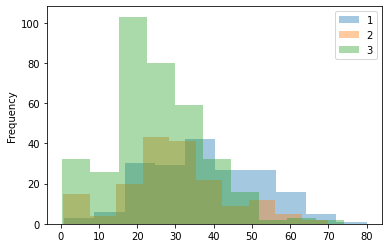

In [12]:
###JHU
train_data.groupby(['Pclass'])['Age'].plot.hist(alpha=0.4,stacked=True,legend=True)


<AxesSubplot:xlabel='Age', ylabel='Count'>

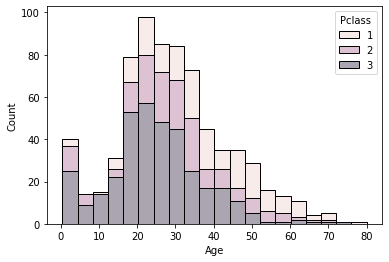

In [13]:
###JHU

sb.histplot(data=train_data,x="Age",hue="Pclass",multiple="stack",alpha=0.4)

In [14]:
print('median_for_Age_seperated_by_Pclass:')
display(train_data.groupby('Pclass')['Age'].median())

print('median_for_Age_seperated_by_Pclass_and_Sex:')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())

print('bumber_of_cases:')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())

median_for_Age_seperated_by_Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

median_for_Age_seperated_by_Pclass_and_Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

bumber_of_cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [15]:
#replace the missing value with the medians of each group

###JHU learn the way to fill the null values in the dataset###

df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
df_all.sample(5)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
828,25.0,NaN,Q,7.7500,"McCormack, Mr. Thomas Joseph",0,829,3,male,0,1.0,367228
919,41.0,A21,S,30.5000,"Brady, Mr. John Bertram",0,920,1,male,0,NaN,113054
412,33.0,C78,Q,90.0000,"Minahan, Miss. Daisy E",0,413,1,female,1,1.0,19928
1117,23.0,NaN,S,7.7958,"Asplund, Mr. Johan Charles",0,1118,3,male,0,NaN,350054
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086


In [16]:
####2 data cleansing 
### 2.2 Fare


In [17]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [18]:
#loc cases which are similiar to Mr.Thomas and use the median of fare to replace the missing for his data set
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()
print(mr_thomas)

#
df_all.loc[df_all['Fare'].isnull(),'Fare']=mr_thomas

###JHU anywany we can wrote it more simple?

7.925


In [19]:
####2 data cleansing 
### 2.3 Cabin


In [20]:
display(train_data['Cabin'].unique())
print('there_are '+str(train_data['Cabin'].nunique())+' different_values_for_Cabin_and '+str(train_data['Cabin'].isnull().sum())+' cases_are_missing')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

there_are 147 different_values_for_Cabin_and 687 cases_are_missing


In [21]:
############################################################################################################################################ Google Colab

train_data['Cabin'].value_counts()   ## code work


C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
E58            1
D7             1
C118           1
B4             1
A34            1
Name: Cabin, Length: 147, dtype: int64

In [22]:
train_data.info()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin 

In [23]:
#

##print(train_data[train_data['Cabin'].isnull()])
#Then for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:
##train_data['Cabin'] = pd.to_numeric(train_data['Cabin'], errors='coerce')
#And for remove all rows with NaNs in column x use dropna:
##train_data = train_data.dropna(subset=['Cabin'])
#Last convert values to ints:
##train_data['Cabin'] = train_data['Cabin'].astype(int)


#for dataset in df_all:
    #dataset['Cabin'] = dataset['Cabin'].astype('int').str.slice(0,1)
    #dataset['Cabin']=dataset['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s).astype(int)
#str.slice(0,1)
#df['purchase'].astype(str).astype(int)

#df_all['Cabin']=df_all.groupby(['Pclass','Fare'])['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s)


#train_data.Cabin = train_data.Cabin.astype(int) 
#train_data.info()


In [24]:
#Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
#Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
#Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
#df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
#df.index = ['1st class','2nd class', '3rd class']
#df.plot(kind='bar',stacked=True, figsize=(10,5))



In [25]:

#cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
#df_all['Cabin'] = df_all['Cabin'].map(cabin_mapping)


#####################################################################################################################################

       Age Cabin Embarked     Fare                                      Name  \
412   33.0   C78        Q  90.0000                    Minahan, Miss. Daisy E   
1244  49.0   NaN        S  65.0000                        Herman, Mr. Samuel   
209   40.0   A31        C  31.0000                          Blank, Mr. Henry   
1004  18.5   NaN        Q   7.2833                  Buckley, Miss. Katherine   
1139  29.0   NaN        S  26.0000  Hold, Mrs. Stephen (Annie Margaret Hill)   

      Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket Deck  
412       0          413       1  female      1       1.0   19928    C  
1244      2         1245       2    male      1       NaN  220845  NaN  
209       0          210       1    male      0       1.0  112277    A  
1004      0         1005       3  female      0       NaN  329944  NaN  
1139      0         1140       2  female      1       NaN   26707  NaN  


Text(0.5, 0.98, 'Count_for_different_Deck')

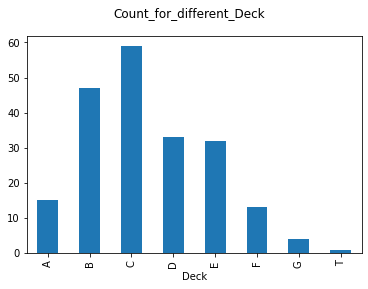

In [26]:
#keep all first letters of Cabin in new variable and use "M" for each missing
###JHU any better way to do this?
#####################################################################################################################################

df_all['Deck']=df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s)

#df_all['Deck']=df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else df_all.groupby(['Pclass','Fare'])['Cabin'].median())


#
#df_all['Deck']=df_all(['Pclass','Fare'])['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')


print(df_all.sample(5))
import matplotlib.pyplot as pl

df_all.groupby('Deck')['Survived'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Deck')


##
#orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)


##
#df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
#df_all.sample(5)


#
#df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar')
#pl.suptitle('Survival_rates_for_different_cabines')

Text(0.5, 0.98, 'Survival_mean_for_different_Deck')

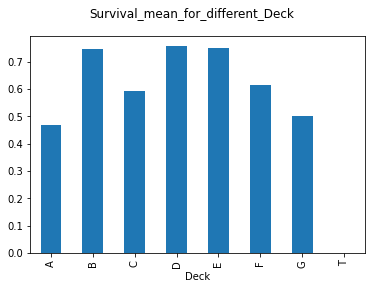

In [27]:
##################################################################################################################################

df_all.groupby('Deck')['Survived'].mean().plot(kind='bar')
pl.suptitle('Survival_mean_for_different_Deck')


In [28]:
############################################################################################################################# cut Fare feature into sever bins
#df_all_1=df_all
#df_all_1['Fare']=pd.cut(df_all_1['Fare'],5,labels=["<102","<204","<307","<409","<512"])

#df_all_1['Fare'].value_counts()

#df_all_1.groupby('Fare')['Survived'].count().plot(kind='bar')

Pclass  Fare
1       <102    2.0
        <204    NaN
        <307    NaN
        <409    3.0
        <512    3.0
2       <102    NaN
        <204    6.0
        <307    4.0
        <409    6.0
        <512    NaN
3       <102    6.0
        <204    7.0
        <307    7.0
        <409    6.0
        <512    NaN
Name: Deck, dtype: float64

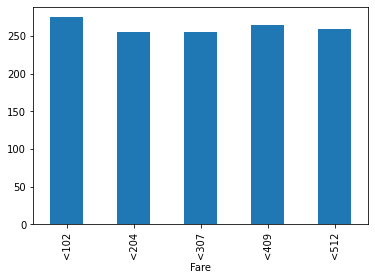

In [29]:
############################################################################################################################# Groupby Pclass Fare

df_all['Fare']=pd.qcut(df_all['Fare'],5,labels=["<102","<204","<307","<409","<512"])
###JHU change the orignal ,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"] to ,labels=["<102","<204","<307","<409","<512"]

df_all.groupby('Fare')['Fare'].count().plot(kind='bar')

# map letters to numbers so we could do mathematical operations, then we'll convert back to letters
deck_dict = {'A': 1,
'B': 2,
'C': 3,
'D': 4,
'E': 5,
'F': 6,
'G': 7,
'T': 8
}
df_all['Deck'] = df_all['Deck'].map(deck_dict)

# group by Pclass and Fare and make the median
median_deck = df_all.groupby(['Pclass','Fare'])
median_deck['Deck'].median()


In [30]:
############################################################################################################################## Groupby Pclass Age

df_all['Age']=pd.cut(df_all['Age'],5,labels=["<16","<32","<48","<64","<80"])

# group by Pclass and Fare and make the median
median_deck_2 = df_all.groupby(['Pclass','Age'])
median_deck_2['Deck'].median()


Pclass  Age
1       <16    2.0
        <32    3.0
        <48    3.0
        <64    3.0
        <80    2.0
2       <16    6.0
        <32    5.5
        <48    5.0
        <64    5.0
        <80    NaN
3       <16    7.0
        <32    6.0
        <48    6.0
        <64    NaN
        <80    NaN
Name: Deck, dtype: float64

In [31]:
############################################################################################################################### Fillin Cabin based on Pclass Fare


# Fill up the NaNs for the cabin based on the grouping above
df_all['Deck'] = median_deck['Deck'].transform(lambda x: x.fillna(x.median()))
df_all.info()

df_all.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1307 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         1264 non-null   float64 
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 115.6+ KB


/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
609,<48,C125,S,<512,"Shutes, Miss. Elizabeth W",0,610,1,female,0,1.0,PC 17582,3.0
1144,<32,NaN,S,<204,"Salander, Mr. Karl Johan",0,1145,3,male,0,NaN,7266,7.0
1077,<32,NaN,S,<307,"Phillips, Miss. Alice Frances Louisa",1,1078,2,female,0,NaN,S.O./P.P. 2,4.0
776,<32,F38,Q,<102,"Tobin, Mr. Roger",0,777,3,male,0,0.0,383121,6.0
416,<48,NaN,S,<409,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",1,417,2,female,1,1.0,28220,6.0


In [32]:
#################################################################################################################################

print('null_value_in_Deck_column')
df_all['Deck'].isnull().sum()


#
#print("missing_values_in_train_data")
#display(train_data.isnull().sum())
#print("missing_value_in_test_data")
#display(test_data.isnull().sum())


null_value_in_Deck_column


45

Text(0.5, 0.98, 'Count_for_different_Deck_after_fillin_operation')

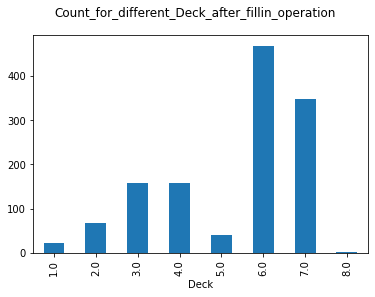

In [33]:
##################################################################################################################################

df_all.groupby('Deck')['Deck'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Deck_after_fillin_operation')

###JHU Same As below code
#df_all.groupby('Deck')['Survived'].count().plot(kind='bar')

Text(0.5, 0.98, 'Survival_mean_for_different_Deck_after_fillin_operation')

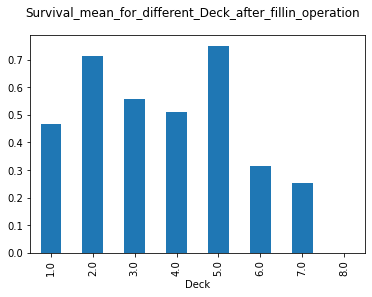

In [34]:
##################################################################################################################################

df_all.groupby('Deck')['Survived'].mean().plot(kind='bar')
pl.suptitle('Survival_mean_for_different_Deck_after_fillin_operation')


Text(0.5, 0.98, 'Count_for_different_Fare_Group')

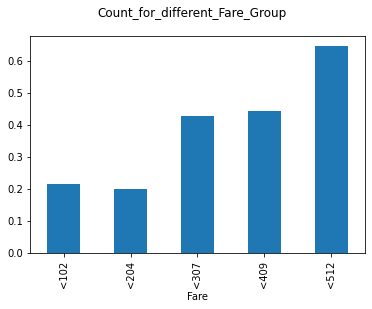

In [35]:
################################################################################################################################## Check if Deck 6 and 7 were low price ticket

df_all.groupby('Fare')['Survived'].mean().plot(kind='bar')
pl.suptitle('Count_for_different_Fare_Group')


Text(0.5, 0.98, 'Count_for_different_Fare_Group')

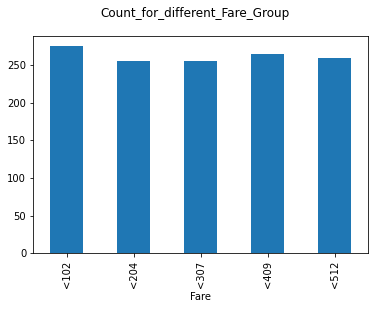

In [36]:
################################################################################################################################## Check if Deck 6 and 7 were low price ticket

df_all.groupby('Fare')['Fare'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Fare_Group')


<AxesSubplot:xlabel='Deck'>

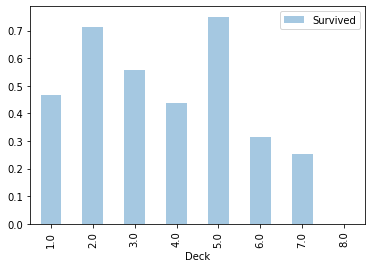

In [37]:
##################################################################################################################################

###JHU


df_all['Deck'] = df_all['Deck'].fillna(4)


df_all.groupby('Deck')['Survived'].mean().plot(kind='bar',alpha=0.4,legend=True)

In [38]:
##################################################################################################################################


# revert back to letters
deck_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df_all['Deck'] = df_all['Deck'].apply(lambda x: deck_letters[int(x - 1)])
df_all.head()



,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,<32,NaN,S,<102,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,F
1,<48,C85,C,<512,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,<32,NaN,S,<204,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,G
3,<48,C123,S,<512,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,<48,NaN,S,<204,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,G


In [39]:
############################################# not use

#idx=df_all[df_all['Deck']=='T'].index
#df_all.loc[idx,'Deck']='A'

###JHU maybe we can category Deck based on the Survival_rate in above chart???

#df_all['Deck']=df_all['Deck'].replace(['B','D','E'],'BDE')
#df_all['Deck']=df_all['Deck'].replace(['C','F','G'],'CFG')
#df_all['Deck']=df_all['Deck'].replace(['A','M','T'],'AMT')

###JHU 0.8475336322869955 not good as 87%

#
#df_all['Deck']=df_all['Deck'].replace(['A','B','C'],'ABC')
#df_all['Deck']=df_all['Deck'].replace(['D','E'],'DE')
#df_all['Deck']=df_all['Deck'].replace(['F','G'],'FG')

#df_all['Deck'].value_counts()

In [40]:
####2 data cleansing 
### 2.4 Embarked


In [41]:
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,<48,B28,NaN,<512,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,B
829,<64,B28,NaN,<512,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,B


In [42]:
#check for passengers who were in passenger class 1, on deck abc and paid 80 or less for the tickets
#df_all.loc[(df_all['Pclass']==1)&(df_all['Fare']<=80)&(df_all['Deck']=='ABC')]['Embarked'].value_counts()

#not needed any more cause we can Google the value S

In [43]:
###JHU data 'S' were Google checked, no relationship with above figures

df_all.loc[df_all['Embarked'].isnull(),'Embarked']='S'

In [44]:
####2 data cleansing 
### 2.5 Conclusion


In [45]:
print("missing_in_all_data")
display(df_all.isnull().sum())

missing_in_all_data


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

In [46]:
print("missing_in_train_data")
display(train_data.isnull().sum())

###JHU why still keeps null Age values in train_data, since we have replaced
###median Age value by Pclass and Sex in df_all???

missing_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
####3 feature engineering 
### 3.1 Binning


KeyError: "None of [Index(['Fare'], dtype='object')] are in the [columns]"

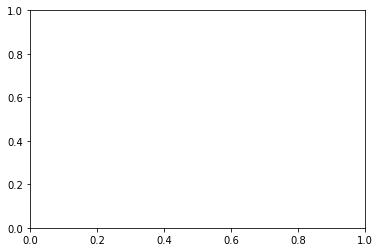

In [49]:
#################################################################################################################################

df_all['Fare'] = df_all['Fare'].astype(str)

df_all.boxplot(column=['Fare'])###,figsize=(15,7))

In [ ]:
###JHU

sb.histplot(data=df_all,x="Fare",alpha=0.4)

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

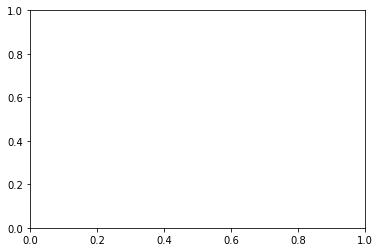

In [50]:
df_all.boxplot(column=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

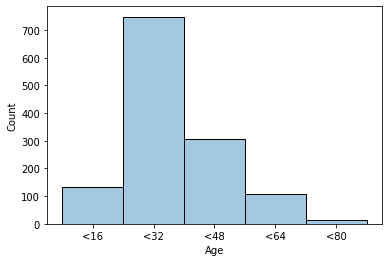

In [51]:
###JHU

sb.histplot(data=df_all,x="Age",alpha=0.4)

In [52]:
###Benedikt Droste
###As you can see, there are outliers for both Age and Fare. 
###The range of values is much higher for Fare compared to Age.
###We will cut the istribution into pieces so that the outliers do not 
###irritate our algorithm. For Fare we will assign the same number of cases 
###to each category and for Age we will build the categories based on the
###values of the variable. This is also the difference between .cut and .qcut.
###With .cut, the bins are formed based on the values of the variable, 
###regardless of how many cases fall into a category. With .qcut we decompose 
###a distribution so that there are the same number of cases in each category.

###JHU
###df_all['Fare']=pd.qcut(df_all['Fare'],5)#### we must run this first to get
###the label range then use label parameter to distribute into the bins

###JHU
#############################################################################################################################################
#df_all['Fare']=pd.qcut(df_all['Fare'],5,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"])

###JHU
#############################################################################################################################################
#df_all['Age']=pd.cut(df_all['Age'],5,labels=["<16","<32","<48","<64","<80"])

print("For_Age,_each_category_has_a_different_number_of_cases:")
df_all['Age'].value_counts()

For_Age,_each_category_has_a_different_number_of_cases:


<32    748
<48    308
<16    134
<64    106
<80     13
Name: Age, dtype: int64

In [53]:
print("For_Fare,_each_category_has_nearly_a_same_number_of_cases:")
df_all['Fare'].value_counts()

For_Fare,_each_category_has_nearly_a_same_number_of_cases:


<102    275
<409    265
<512    259
<204    255
<307    255
Name: Fare, dtype: int64

In [54]:
###JHU
df_all[['Age','Survived']].sample(5)

,Age,Survived
250,<32,0.0
268,<64,1.0
291,<32,1.0
43,<16,1.0
141,<32,1.0


In [55]:
#
df_all[['Age','Survived']].groupby('Age')['Survived'].mean()

#
#df_all.groupby('Age')['Survived'].mean()


Age
<16    0.550000
<32    0.336714
<48    0.412844
<64    0.434783
<80    0.090909
Name: Survived, dtype: float64

In [56]:
#
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean()

#
#df_all.groupby('Fare')['Survived'].mean()

Fare
<102    0.217877
<204    0.201087
<307    0.426901
<409    0.443243
<512    0.645349
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Survival_rates_for_Age_categories')

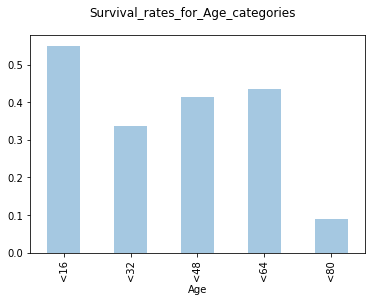

In [57]:
#
df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survival_rates_for_Age_categories')

#
#df_all.groupby('Age')['Survived'].mean().plot(kind='bar',alpha=0.4)
#pl.suptitle('Survival_rates_for_Age_categories')

Text(0.5, 0.98, 'Survivel_rate_for_Fare_categories')

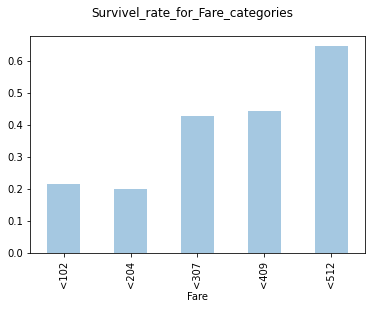

In [58]:
#
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survivel_rate_for_Fare_categories')

#
#df_all.groupby('Fare')['Survived'].mean().plot(kind='bar',alpha=0.4)
#pl.suptitle('Survivel_rate_for_Fare_categories')

In [59]:
####3.2 Creat new features out of existing variables 
#### Family Size

###JHU why we do it this way, i see no logic between SibSp or Parch with 
###JHU Family_size, and Family_size will not effect the Survival_rate of 
###JHU individual

<AxesSubplot:ylabel='Frequency'>

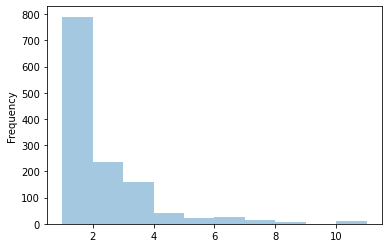

In [60]:
#
df_all['Family_size']=df_all['SibSp']+df_all['Parch']+1
#
df_all['Family_size'].plot.hist(alpha=0.4)

In [61]:
#
df_all['Family_size_bin']=df_all['Family_size'].map(lambda s:1 if s==1 else(2 if s==2 else(3 if 3<=s<=4 else(4 if s>=5 else 0))))

In [62]:
#
df_all['Family_size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_size_bin, dtype: int64

<AxesSubplot:xlabel='Family_size_bin'>

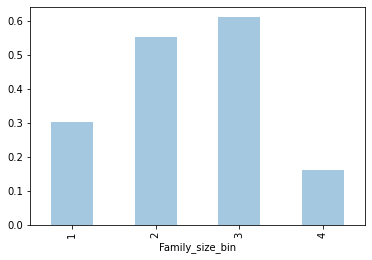

In [63]:
#
df_all[['Family_size_bin','Survived']].groupby('Family_size_bin')['Survived'].mean().plot(kind='bar',alpha=0.4)

###JHU why the auther odes not code the simplest way?

#
#df_all.groupby('Family_size_bin')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [64]:
####3 Creat new features out of existing variables Tickets

###JHU ?

In [65]:
#
df_all['Ticket_frequency']=df_all.groupby('Ticket')['Ticket'].transform('count')

#df_all['Ticket_frequency']=df_all.groupby('Ticket')['Ticket'].apply('count')


###JHU
df_all['Ticket_frequency'].sample(5)

###JHU .transform('count') and what why 'count'
###so 1 means most ticket sold category or something??

792    11
772     2
421     1
946     6
273     1
Name: Ticket_frequency, dtype: int64

In [66]:
#many code style?
#df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency').mean()

df_all.groupby('Ticket_frequency')['Survived'].mean()


Ticket_frequency
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Ticket_frequency'>

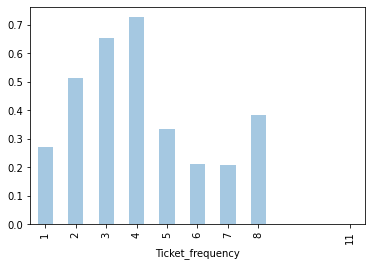

In [67]:
#
#df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency')['Survived'].mean().plot(kind='bar',alpha=0.4)

###JHU why the auther odes not code the simplest way? 

df_all.groupby('Ticket_frequency')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [68]:
####3.2 Creat new features out of existing variables 
#### Title


In [69]:
###JHU

df_all.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency
832,<32,NaN,C,<102,"Saad, Mr. Amin",0,833,3,male,0,0.0,2671,F,1,1,1
582,<64,NaN,S,<409,"Downton, Mr. William James",0,583,2,male,0,0.0,28403,F,1,1,2
952,<32,NaN,S,<307,"McCrae, Mr. Arthur Gordon",0,953,2,male,0,NaN,237216,D,1,1,1
13,<48,NaN,S,<409,"Andersson, Mr. Anders Johan",5,14,3,male,1,0.0,347082,F,7,4,7
446,<16,NaN,S,<307,"Mellinger, Miss. Madeleine Violet",1,447,2,female,0,1.0,250644,D,2,2,2


In [70]:
df_all['Title']=df_all['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
df_all['Is_married']=0
df_all['Is_married'].loc[df_all['Title']=='Mrs']=1


###JHU is that a joke or something? it seems many codes are reduandant or just
###JHU be there to help the reader learning to code in a proper way??

df_all['Title'].nunique()

/home/marry/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


18

In [71]:
###JHU

df_all['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [72]:
title_names=(df_all['Title'].value_counts()<10)

df_all['Title']=df_all['Title'].apply(lambda x:'Mice' if title_names.loc[x]==True else x)

df_all.groupby('Title')['Title'].count()

Title
Master     61
Mice       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title'>

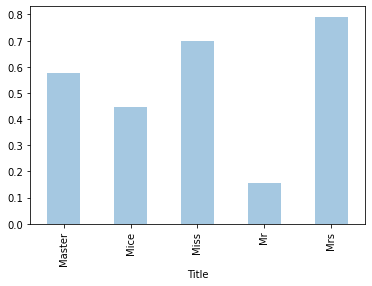

In [73]:
###JHU
df_all[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)


#
#df_all.groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [74]:
####3 Creat new features out of existing variables 
#### Survival Rates


In [75]:
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name=data.iloc[i]
        if '(' in name:
            name_no_bracket=name.split('(')[0]
        else:
            name_no_bracket=name
        family=name_no_bracket.split(',')[0]
        title=name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family=family.replace(c,'').strip()
        families.append(family)
    return families

df_all['Family']=extract_surname(df_all['Name'])

In [76]:
df_all['Family'].nunique()

875

In [77]:
df_all[['Title','Survived','Family_size']].groupby('Title').mean()

###JHU THINK & PRACTICE

,Survived,Family_size
Title,,
Master,0.575000,4.426230
Mice,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival_rates_grouped_by_families_of_women_in_dataset:


<AxesSubplot:ylabel='Frequency'>

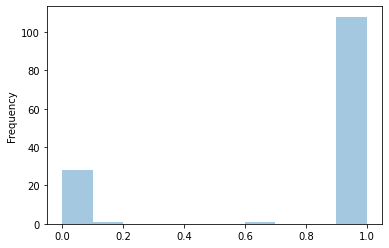

In [78]:
print("Survival_rates_grouped_by_families_of_women_in_dataset:")
df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

###JHU how to read this chart, 0 to 1 on x axes and 0 to 100 on y axes???
###JHU and whats the point doing this
#df_all[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)
#this code works as above df_all.loc[(df_all['Sex']=='female')]



###JHU
###df_all[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

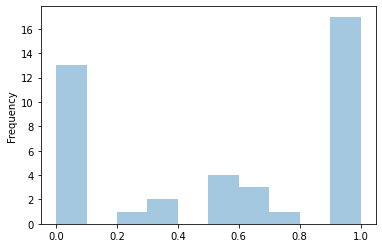

In [79]:
master_families=df_all[df_all['Title']=='Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

###JHU how to read this chart, 0 to 1 on x axes and 0 to 100 on y axes???


In [80]:
#Create variables with the survival rate of the women and masters

women_rate=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean()
master_rate=df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

#Combine two series
combined_rate=women_rate.append(master_rate)

#It is posible that a woman has the family as a master and vice versa, so duplicates have to been dropped
combined_rate_df=combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')

#Merge the new dataframe
df_all=pd.merge(df_all,combined_rate_df,how='left')

In [81]:
#We have calculated a survival rate for only a part of the cases, the others 
#we set to 0 in the dummy variable

df_all['Survival_quota_NA']=1
df_all.loc[df_all['Survival_quota'].isnull(),'Survival_quota_NA']=0
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)


In [82]:
####3.3 Label and One Hot Encoding


In [83]:
###JHU
from sklearn import preprocessing

non_numeric_features=['Embarked','Sex','Title','Age','Fare','Deck']

for feature in non_numeric_features:
    df_all[feature]=preprocessing.LabelEncoder().fit_transform(df_all[feature])
    
cat_features=['Pclass','Sex','Embarked','Title','Deck','Family_size_bin','Age','Fare']
    
encoded_features=[]

for feature in cat_features:
    encoded_feat=preprocessing.OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1,1)).toarray()
    n=df_all[feature].nunique()
    cols=['{}_{}'.format(feature,n) for n in range(1,n+1)]
    encoded_df=pd.DataFrame(encoded_feat,columns=cols)
    encoded_df.index=df_all.index
    encoded_features.append(encoded_df)


df_all=pd.concat([df_all,*encoded_features],axis=1)

In [84]:
df_train,df_test=divide_df(df_all)

In [85]:
####Modeling and prediction


In [86]:
#Defined columns which can be dropped for the modeling part because we 
#created new lable and one hot encoded variants out of them

drop_cols=['Embarked','Family','Family_size','Survived','Family_size_bin',
           'Deck','Age','Name','Parch','PassengerId','Pclass','Sex','SibSp',
           'Title','Ticket','Cabin']

drop_cols_2=['Embarked','Family','Family_size','Family_size_bin','Deck','Fare',
            'Name','Parch','PassengerId','Pclass','Sex','SibSp','Title',
             'Ticket','Cabin']


In [87]:
#setting up a random forest classifier
#standardization of variables

###JHU
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
###JHU from sklearn.preprocessing import StandardScaler

x=preprocessing.StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y=df_train['Survived'].values

x_test=preprocessing.StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))

#creating train, test splits
x_train,x_test1,y_train,y_test1=train_test_split(x,y,test_size=0.25,random_state=42)

#defining model parameters
model=RandomForestClassifier(criterion='gini',
                                          n_estimators=1750,
                                          max_depth=7,
                                          min_samples_split=6,
                                          min_samples_leaf=6,
                                          max_features="auto",
                                          oob_score=True,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

model.fit(x_train,y_train)
predictions=model.predict(x_test)
print(model.score(x_test1,y_test1))
output=pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
output['Survived']=output['Survived'].astype(int)
output.to_csv('2020_00_09_titanic_jjj.csv',index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent worker

0.852017937219731


[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.4s finished
